# Clustering Data Time Series Harga Bahan Pangan 
## Import Library

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv('Might be used/Ori Harian.csv')
drop_columns = ['Beras', 'Bawang Merah', 'Bawang Putih', 'Cabai Merah', 'Cabai Rawit', 'Daging Sapi', 
                'Telur Ayam', 'Daging Ayam', 'Minyak Goreng', 'Gula Pasir']
data = data.drop(drop_columns, axis=1)
# Dataset asli tanpa imputasi dan interpolasi
data.head(5)

,Komoditas (Rp),Beras Kualitas Medium I,Bawang Merah Ukuran Sedang,Bawang Putih Ukuran Sedang,Cabai Merah Keriting,Cabai Rawit Merah,Daging Sapi Kualitas 1,Telur Ayam Ras Segar,Daging Ayam Ras Segar,Minyak Goreng Kemasan Bermerk 1,Gula Pasir Lokal
0,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2020,12150.0,39250.0,32250.0,67500.0,59100.0,121250.0,25900.0,37100.0,13450.0,13200.0
2,3/1/2020,12200.0,38900.0,31100.0,63000.0,60850.0,121250.0,25850.0,37100.0,13500.0,13200.0
3,6/1/2020,12250.0,36650.0,31250.0,64250.0,76150.0,121250.0,25650.0,35850.0,13500.0,13200.0
4,7/1/2020,12250.0,34600.0,31400.0,63600.0,64150.0,121250.0,25600.0,35900.0,13550.0,13350.0


## Exploratory Data
Mengganti nama kolom berdasarkan nama generalnya

In [3]:
data = data.rename(columns={'Komoditas (Rp)':'Tanggal', 'Beras Kualitas Medium I': 'Beras', 'Bawang Merah Ukuran Sedang':'Bawang Merah',
                            'Bawang Putih Ukuran Sedang':'Bawang Putih', 'Cabai Merah Keriting': 'Cabai Merah', 'Cabai Rawit Merah':'Cabai Rawit', 
                            'Daging Sapi Kualitas 1':'Daging Sapi', 'Telur Ayam Ras Segar':'Telur Ayam', 'Daging Ayam Ras Segar':'Daging Ayam',
                           'Minyak Goreng Kemasan Bermerk 1':'Minyak Goreng', 'Gula Pasir Lokal':'Gula Pasir'})
data.head(5)

,Tanggal,Beras,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Daging Sapi,Telur Ayam,Daging Ayam,Minyak Goreng,Gula Pasir
0,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2020,12150.0,39250.0,32250.0,67500.0,59100.0,121250.0,25900.0,37100.0,13450.0,13200.0
2,3/1/2020,12200.0,38900.0,31100.0,63000.0,60850.0,121250.0,25850.0,37100.0,13500.0,13200.0
3,6/1/2020,12250.0,36650.0,31250.0,64250.0,76150.0,121250.0,25650.0,35850.0,13500.0,13200.0
4,7/1/2020,12250.0,34600.0,31400.0,63600.0,64150.0,121250.0,25600.0,35900.0,13550.0,13350.0


Mengubah fitur Komoditas (Rp) menjadi datetime agar bisa diubah formatnya menjadi data mingguan.

In [4]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format="%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tanggal        1305 non-null   datetime64[ns]
 1   Beras          1255 non-null   float64       
 2   Bawang Merah   1255 non-null   float64       
 3   Bawang Putih   1255 non-null   float64       
 4   Cabai Merah    1255 non-null   float64       
 5   Cabai Rawit    1255 non-null   float64       
 6   Daging Sapi    1255 non-null   float64       
 7   Telur Ayam     1255 non-null   float64       
 8   Daging Ayam    1255 non-null   float64       
 9   Minyak Goreng  1255 non-null   float64       
 10  Gula Pasir     1255 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 112.3 KB


Mengecek nilai kosong atau missing value

In [5]:
print('Jumlah Data yang kosong')
data.isnull().sum()

Jumlah Data yang kosong


Tanggal           0
Beras            50
Bawang Merah     50
Bawang Putih     50
Cabai Merah      50
Cabai Rawit      50
Daging Sapi      50
Telur Ayam       50
Daging Ayam      50
Minyak Goreng    50
Gula Pasir       50
dtype: int64

Pada masing-masing fitur memiliki banyak missing value. Terjadi karena pada akhir pekan dan hari libur nasional tidak dilakukan input nilai ke sistem. Terlebih data yang digunakan merupakan data harian. Rasio jumlah data dan nilai kosong adalah 
<div>
<div style="text-align: center;">
    <img src="https://latex.codecogs.com/png.image?\dpi{120} \frac{50}{1255} \times 100\% = 3.98\% \approx 4\%" alt="Ratio Missing Value">
</div>
</div>

Jumlah data yang kosong, ~4% dan data valid sebesar 95% di mana termasuk rendah dan masih dapat diatasi menggunakan teknik imputasi atau pembersihan ringan yang akan dilakukan pada tahap _data preparation_. Pada visualisasi _time-series_ di atas, pola juga masih terlihat dengan banyak fluktuasi.

In [6]:
data.describe().round(2)

,Tanggal,Beras,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Daging Sapi,Telur Ayam,Daging Ayam,Minyak Goreng,Gula Pasir
count,1305,1255.00,1255.00,1255.00,1255.00,1255.00,1255.00,1255.00,1255.00,1255.00,1255.00
mean,2022-07-01 19:12:00,12963.78,36366.02,32917.45,45491.16,55206.77,135114.86,26270.80,37447.85,17923.63,15163.35
min,2020-01-01 00:00:00,11400.00,21400.00,20250.00,20350.00,22500.00,121250.00,18350.00,31100.00,13200.00,12950.00
25%,2021-04-01 00:00:00,11700.00,30250.00,26500.00,32400.00,38300.00,132500.00,24250.00,35900.00,15400.00,13700.00
50%,2022-07-01 00:00:00,12400.00,34400.00,29850.00,42100.00,49000.00,137500.00,26350.00,37250.00,18500.00,14700.00
75%,2023-10-02 00:00:00,14500.00,41125.00,40150.00,54500.00,69200.00,141650.00,28150.00,38750.00,19400.00,17100.00
max,2024-12-31 00:00:00,16850.00,73600.00,59000.00,126400.00,134500.00,165850.00,32600.00,46100.00,24750.00,18900.00
std,NaN,1409.43,9214.59,7451.49,17996.34,23510.57,7907.35,3101.36,2355.44,2786.25,1764.87


Insight:
1. **Beras : Beras Kualitas Medium**, rata-rata harga beras adalah Rp12.963 atau sekitar Rp13.000. Persebaran harganya dimulai dari Rp11.400 hingga Rp16.850, tidak menunjukkan selisih dan persebaran yang terlalu besar.
2. **Bawang Merah : Bawang Merah Ukuran Sedang**, rata-rata harga bawang merah per-kilogram mencapai Rp36.366. Persebaran harganya dimulai dari Rp21.400 hingga Rp73.600. Rentang harga menunjukkan nilai yang tinggi dan terdapat variasi harga yang cukup tinggi.
3. **Bawang Putih : Bawang Putih Ukuran Sedang**, rata-rata harga bawahng putih per-kilogram mencapai Rp32.917 atau sekitar Rp33.000. Persebaran harga dimulai dari Rp20.250 hingga Rp59.000 dengan persebaran sedang yang tidak terlalu tinggi.
4. **Cabai Merah : Cabai Merah Keriting**, rata-rata harga cabai merah per-kilogram mencapai harga Rp45.491. Persebaran harga dimulai dari Rp20.350 hingga Rp126.400 dengan nilai standar deviasi sebesar 17.996 menunjukkan persebaran harga lebih tinggi dan mengindikasikan bahwa komoditas ini memiliki harga yang fluktuatif.
5. **Cabai Rawit : Cabai Rawit Merah**, rata-rata harga cabai rawit merah menunjukkan harga Rp55.206. Persebaran harga dimulai dari RpRp22500 hingga Rp134500, jarak kedua harga mencapai Rp112.00 dan standar deviasi mencapai Rp23.510. Termasuk persebarannya tinggi dan dikhawatirkan harga sangat fluktuatif.
6. **Daging Sapi : Daging Sapi Kualitas 1**, rata-rata harga daging sapi mencapai Rp135.114. Persebaran harga dimulai dari Rp121.250 hingga Rp165.850. Meskipun harga daging sapi termasuk tinggi, tetapi persebarannya tidak terlalu tinggi dengan standar deviasi mencapai 7.907. Nilai rata-rata lebih denat dengan Q1 di mana harga cenderung rendah.
7. **Telur Ayam : Telur Ayam Ras Segar**, rata-rata harga telur ayam mencapai Rp26.270 dengan persebaran mulai Rp18.350 hingga Rp32.600. Nilai rata-rata lebih dekat dengan nilai Q3, artinya data menyebar di atas nilai rata-rata.
8. **Daging Ayam : Daging Ayam Ras Segar**, rata-rata harga daging ayam per-kilogram mencapai Rp37.477 dengan persebaran mulai Rp31.100 hingga Rp46.100. (belum paham nih sama daging ayam gimana.
9. **Minyak Goreng : Minyak Goreng Kemasan Bermerk 1**, harga rata-rata minyak goreng bermerk Rp17.923 atau sekitar Rp18.000 dengan rentang mulai Rp13.200 hingga Rp24.750. Dilihat dari nilai Q3, Q2, dan Q1 menunjukkan bahwa harga minyak goreng bermerk tersebar ke atas.
10. **Gula Pasir : Gula Pasir Lokal**, rata-rata harga bahan pangan mencapai Rp15.163 per-kilogramnya. Rentang harga mulai dari Rp12.950 hingga Rp18.900 dan simpangan baku 1.764 menunjukkan bahwa sebaran harga Gula Pasir Lokal cenderung stabil  dan merata ke atas.

In [7]:
drop_columns

['Beras',
 'Bawang Merah',
 'Bawang Putih',
 'Cabai Merah',
 'Cabai Rawit',
 'Daging Sapi',
 'Telur Ayam',
 'Daging Ayam',
 'Minyak Goreng',
 'Gula Pasir']

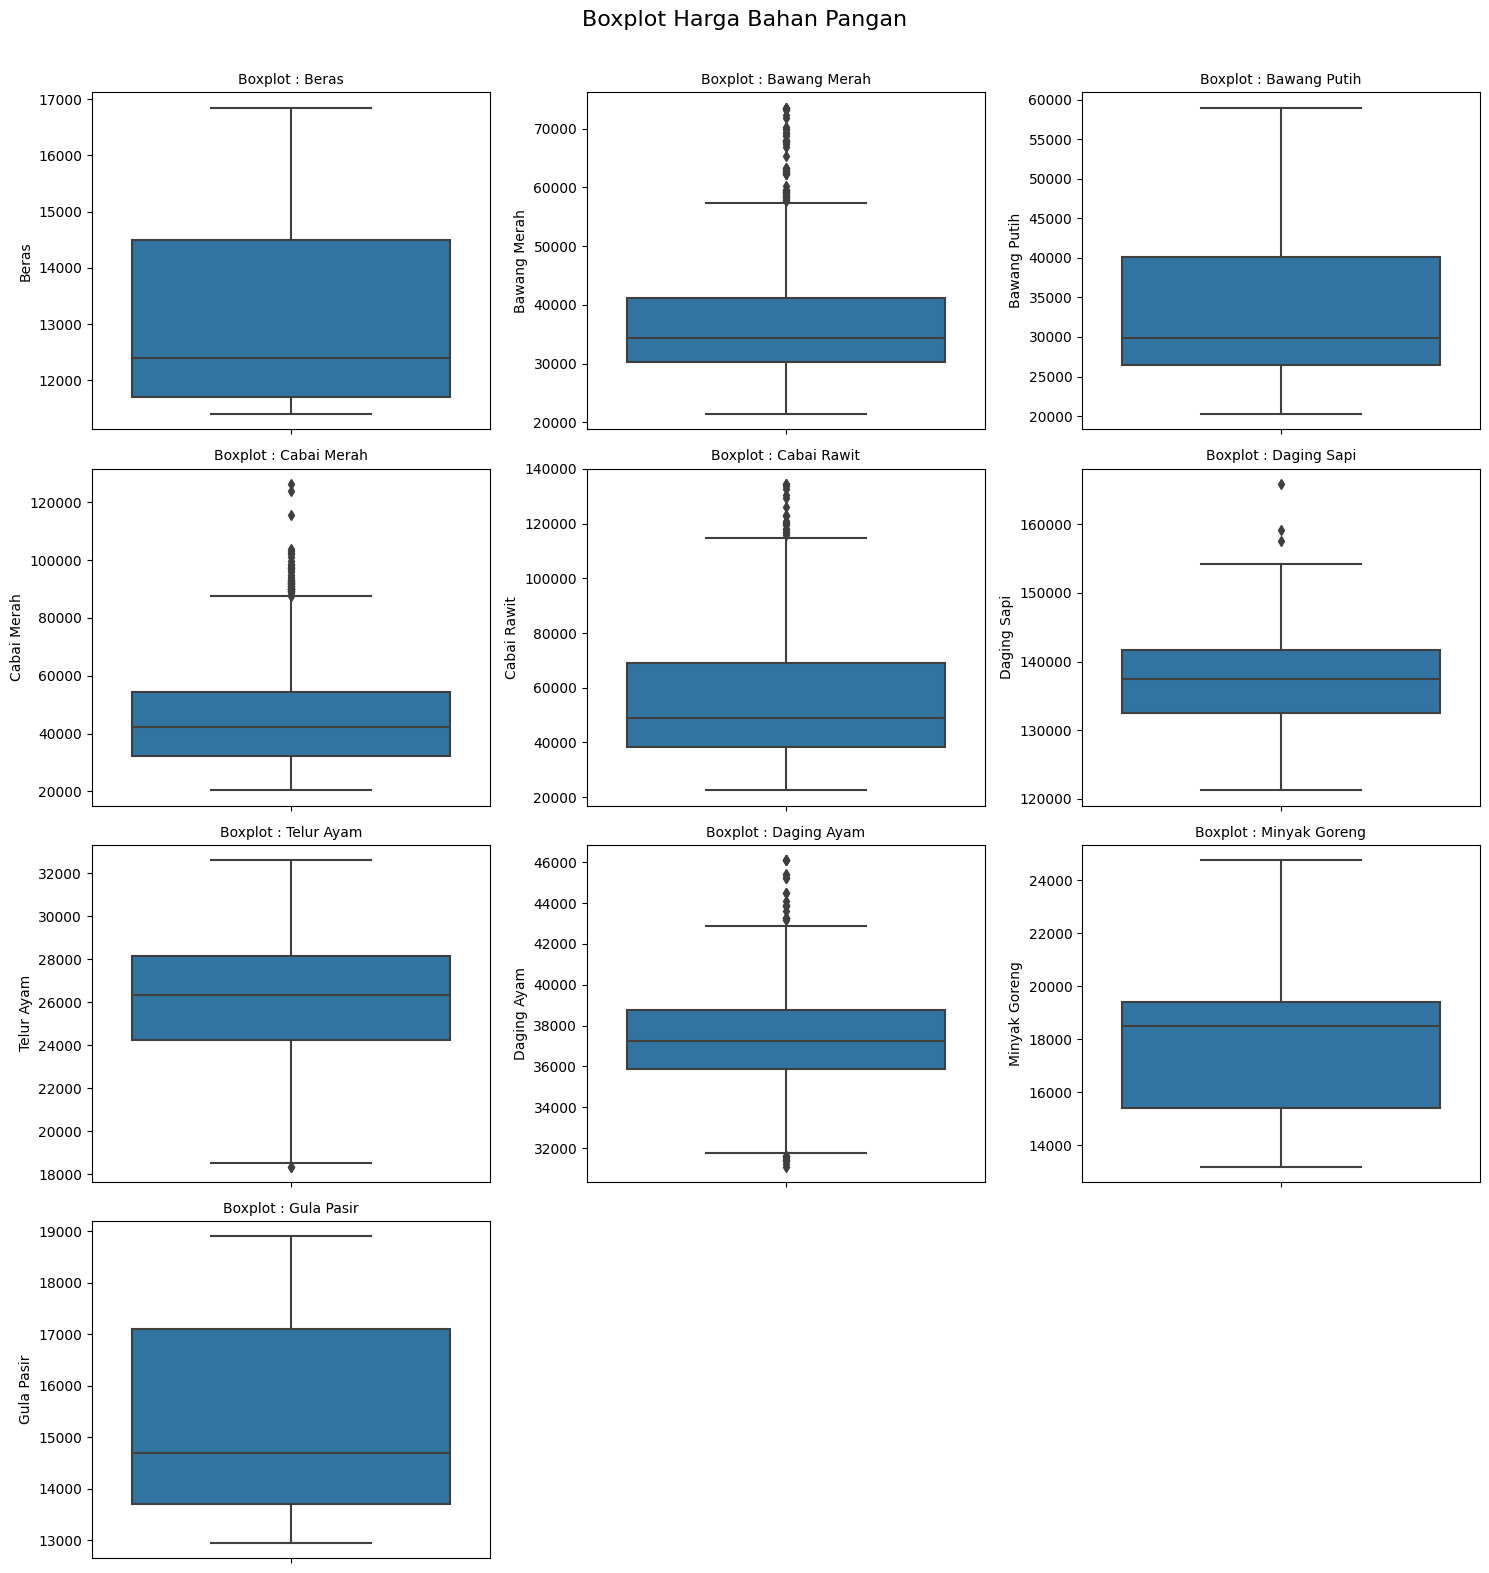

In [8]:
data_vis = data.drop(['Tanggal'], axis=1).copy() # Variabel ini khusus untuk visualisasi, supaya variabel tanggal tidak terbawa divisualisasikan.

# Visualisasi Boxplot Harga Bahan Pangan
n = len(data_vis.columns)

# Ukuran grid
cols = 3
rows = math.ceil(n/cols)

# Buat plot
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(data_vis.columns):
    sns.boxplot(y=data_vis[col], ax=axes[i])
    axes[i].set_title(f'Boxplot : {col}', fontsize=10)

# Hapus subplot yang kosong
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Sisakan ruang untuk suptitle
plt.suptitle('Boxplot Harga Bahan Pangan', fontsize=16)
plt.show()

insight:
1. Hampir semua fitur memiliki sebaran data mayoritas di atas nilai rata-rata. Kecuali pada fitur Minyak Goreng Bermerk 1, sebaran harganya di bawah nilai rata-rata dan Daging Sapi meskipun memiliki beberapa nilai outlier ke atas.
2. Terdapat beberapa fitur yang memiliki outlier di atas, yaitu Bawang Merah, Cabai Merah, Cabai Rawit, dan Daging Sapi, Telur Ayam dengan sedikit outlier di bawah, dan Daging Ayam dengan outlier di atas dan di bawah.

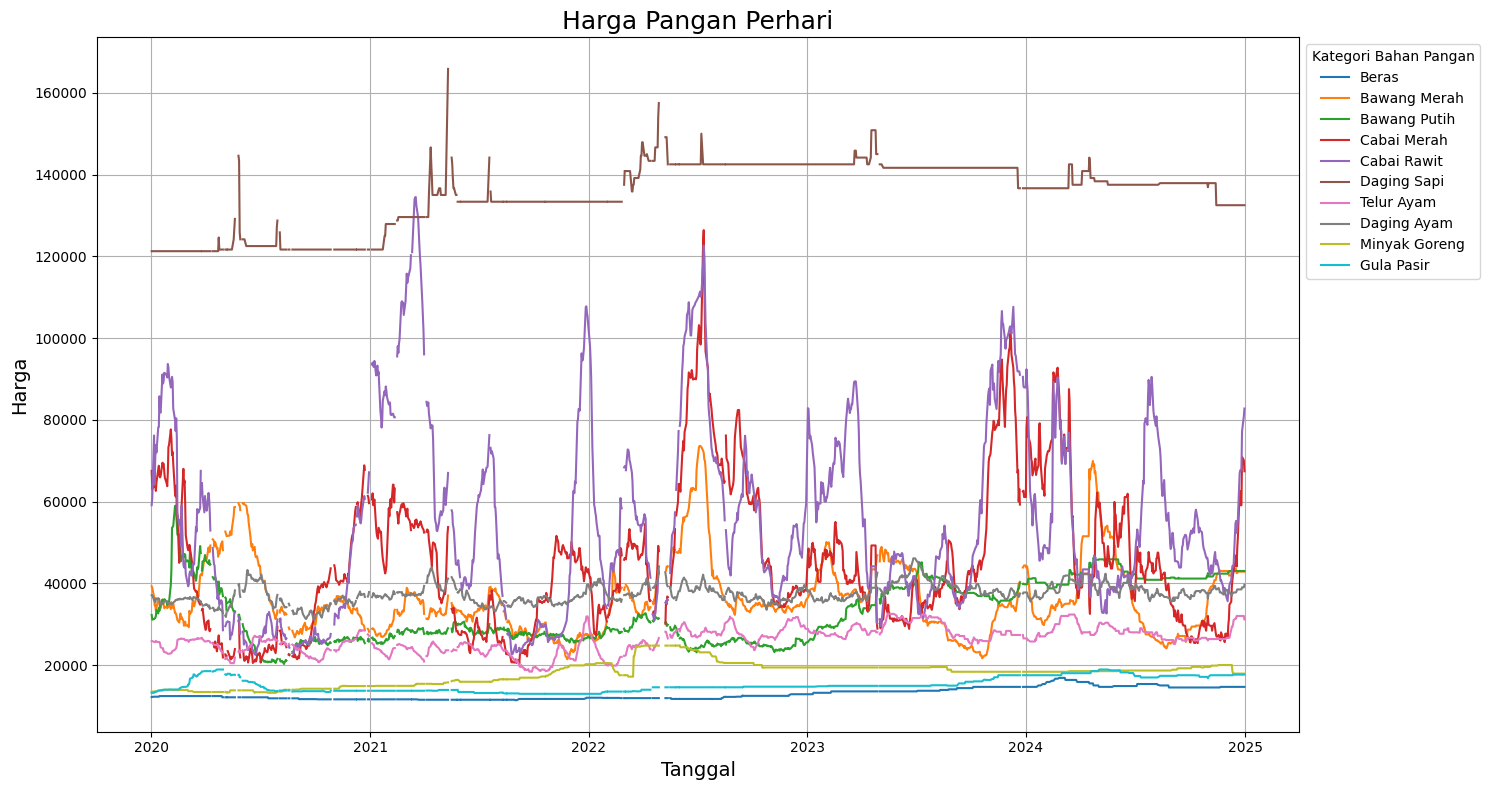

In [9]:
def diagramGarisVis(df, datetime_col, label_name=None, title="Diagram Garis Harga Bahan Pangan"):
    """
    Visualisasi Diagram Garis Harga Bahan Pangan.
    
    Parameters:
    - df: DataFrame berisi data harga
    - datetime_col: nama kolom untuk sumbu x (string)
    - label_name: label untuk legend, default-nya adalah nama-nama kolom selain datetime_col
    - title: judul grafik
    """
    figure(figsize=(15, 8), dpi=100)

    data_vis = df.drop(columns=[datetime_col])
    if label_name is None:
        label_name = drop_columns

    for col, label in zip(data_vis.columns, label_name):
        plt.plot(df[datetime_col], df[col], label=label)

    plt.legend(title='Kategori Bahan Pangan', loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(title, fontsize=18)
    plt.xlabel(datetime_col, fontsize=14)
    plt.ylabel('Harga', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

diagramGarisVis(data, datetime_col='Tanggal', title='Harga Pangan Perhari')

Insight.
1. Data yang kosong mempengaruhi pola pada data.
2. Data Cabai Rawit, Cabai Merah, dan Bawang Merah dengan pola fluktuatif ekstrim.
3. Harga Daging Sapi memiliki harga yang peling tinggi dan cenderung stabil.
4. Pola fluktuasi harga bahan pangan di akhir tahun dan awal tahun cenderung meningkat dan tidak stabil.
5. Fluktuasi harga yang paling tinggi terjadi pada awal tahun 2021 dan pertengahan tahun 2022.

## Data Preparation
Meliputi tahapan:
1. Menambahkan fitur tahun,
2. Feature Engineering dengan mengubah data harian menjadi data mingguan,
3. MinMax Scaling,
4. Reduksi dimensi data menggunakan teknik PCA.
5. Transformasi data untuk proses clustering time series

In [10]:
# Menambahkan fitur tahun
data['Tahun'] = data['Tanggal'].dt.year
data

,Tanggal,Beras,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Daging Sapi,Telur Ayam,Daging Ayam,Minyak Goreng,Gula Pasir,Tahun
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,2020-01-02,12150.0,39250.0,32250.0,67500.0,59100.0,121250.0,25900.0,37100.0,13450.0,13200.0,2020
2,2020-01-03,12200.0,38900.0,31100.0,63000.0,60850.0,121250.0,25850.0,37100.0,13500.0,13200.0,2020
3,2020-01-06,12250.0,36650.0,31250.0,64250.0,76150.0,121250.0,25650.0,35850.0,13500.0,13200.0,2020
4,2020-01-07,12250.0,34600.0,31400.0,63600.0,64150.0,121250.0,25600.0,35900.0,13550.0,13350.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2024-12-25,14650.0,42850.0,43000.0,59100.0,67650.0,132500.0,32000.0,38500.0,17900.0,17650.0,2024
1301,2024-12-26,14650.0,42850.0,43000.0,59100.0,67650.0,132500.0,32000.0,38500.0,17900.0,17650.0,2024
1302,2024-12-27,14650.0,42850.0,43000.0,70900.0,77150.0,132500.0,32000.0,39000.0,17900.0,17650.0,2024
1303,2024-12-30,14650.0,42850.0,43000.0,70100.0,80850.0,132500.0,32000.0,39000.0,17900.0,17650.0,2024


<h2>Transformasi ke Data Mingguan

In [40]:
# Urutkan berdasarkan tanggal
data_mingguan = data.sort_values(by='Tanggal').reset_index(drop=True)

# Membuat minggu di kolom pertama
data_mingguan['Minggu ke'] = None
data.loc[data['Tanggal'].between("2020-01-01", "2020-01-03"), "Minggu ke"] = 1

# Filter hari kerja
data_sisa = data.loc[data_mingguan['Minggu ke'].isna() & data['Tanggal'].dt.weekday<5].copy()

# Hitung minggu ke berdasarkan hari kerja setelah 3 Januari 2020
data_sisa['Minggu ke'] = ((data_sisa['Tanggal'] - pd.Timestamp("2020-01-06")).dt.days // 7) +2

# gabungkan kembali data
data_mingguan.update(data_sisa)

data_mingguan['Tahun'] = data['Tanggal'].dt.year
data_mingguan.to_csv('Might be used/cek minggu.csv')
# data.replace(0, pd.NA, inplace=True)

data_mingguan["Minggu ke"] = data_mingguan["Minggu ke"].astype("Int64")

data_mingguan = data_mingguan.drop(columns=['Tanggal'])
# # Hitung rata-rata per minggu, otomatis mengabaikan NaN
data_mingguan = data_mingguan.groupby("Minggu ke").agg(lambda x: x[x > 0].mean(skipna=True)).reset_index()

# dat_min
data_mingguan

,Minggu ke,Beras,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Daging Sapi,Telur Ayam,Daging Ayam,Minyak Goreng,Gula Pasir,Tahun
0,1,12175.0,39075.0,31675.0,65250.0,59975.0,121250.0,25875.0,37100.0,13475.0,13200.0,2020.0
1,2,12250.0,34640.0,31930.0,63870.0,71350.0,121250.0,25700.0,35910.0,13540.0,13380.0,2020.0
2,3,12340.0,35100.0,33810.0,67030.0,81180.0,121250.0,25290.0,35640.0,13730.0,13780.0,2020.0
3,4,12400.0,34920.0,35690.0,68210.0,90470.0,121250.0,23570.0,35430.0,13870.0,13930.0,2020.0
4,5,12400.0,34360.0,35210.0,68520.0,91660.0,121250.0,22820.0,35260.0,13950.0,13960.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,14650.0,42560.0,42640.0,29960.0,37530.0,132500.0,26650.0,37990.0,20000.0,17500.0,2024.0
258,259,14650.0,43200.0,43000.0,40150.0,43340.0,132500.0,29670.0,37410.0,18840.0,17560.0,2024.0
259,260,14650.0,42970.0,43000.0,47230.0,54320.0,132500.0,31740.0,38130.0,17900.0,17650.0,2024.0
260,261,14650.0,42850.0,43000.0,62160.0,69400.0,132500.0,32000.0,38600.0,17900.0,17650.0,2024.0


In [41]:
# Disimpan ke dalam bentuk csv

data_mingguan.to_csv("Might be used/Mingguan olah python.csv", index=False)

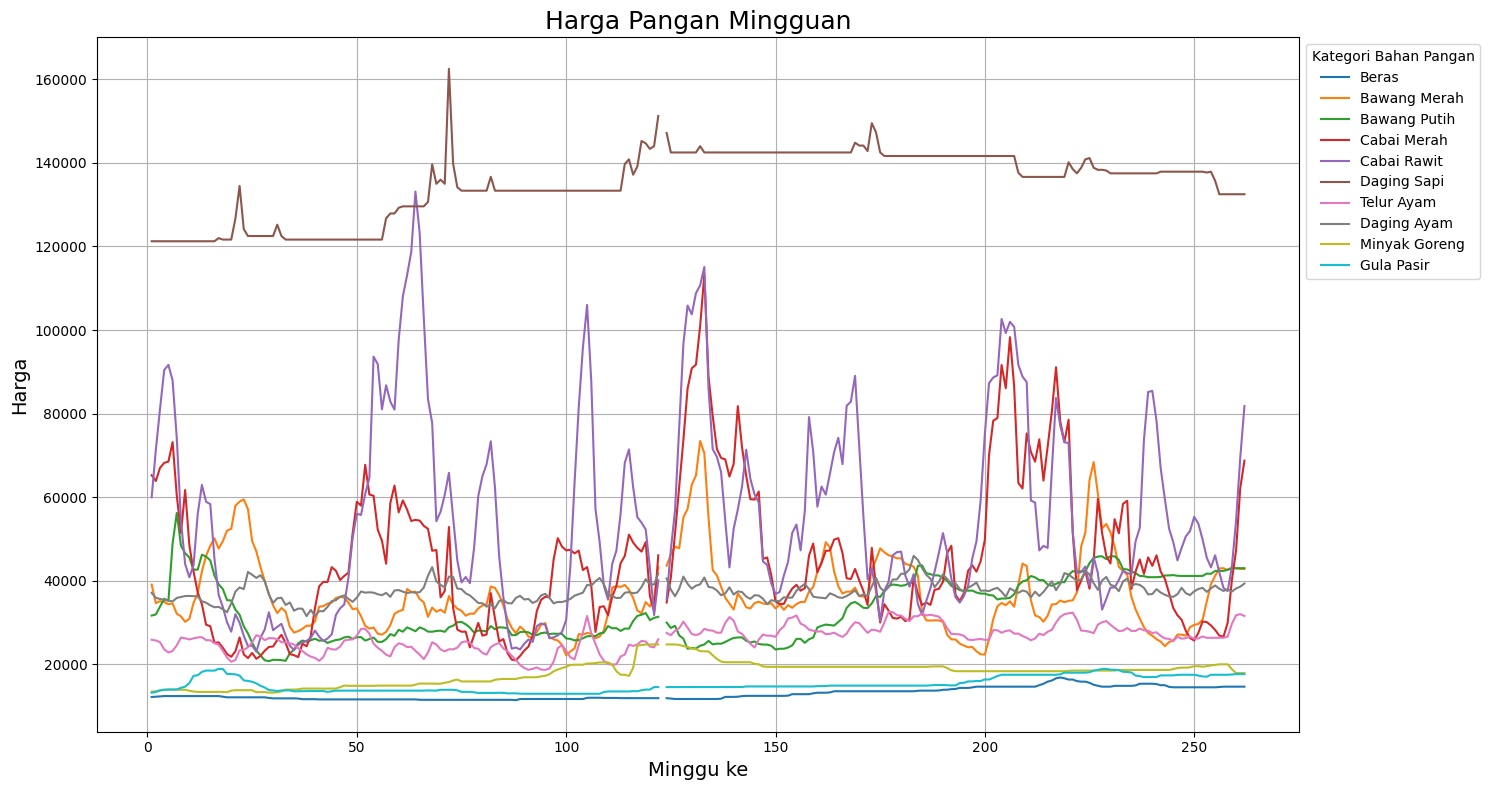

In [42]:
# Visualisasi Harga Bahan Pangan yang Sudah Ditransformasi ke bentuk mingguan
diagramGarisVis(data_mingguan, datetime_col='Minggu ke', title='Harga Pangan Mingguan')

In [43]:
data_mingguan[data_mingguan.isnull().any(axis=1)]

,Minggu ke,Beras,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Daging Sapi,Telur Ayam,Daging Ayam,Minyak Goreng,Gula Pasir,Tahun
122,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0


Terdapat satu minggu kosong, artinya terdapat satu minggu penuh hari libur dan tidak ada pelaporan monitoring harga pangan. Harga yang kosong berada di minggu ke 123 dan pengisian data yang kosong akan diisi menggunakan nilai pada minggu sebelumnya (backward fill)

In [44]:
data_mingguan = data_mingguan.fillna(method='bfill')
data_mingguan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4896\2255206504.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_mingguan = data_mingguan.fillna(method='bfill')


,Minggu ke,Beras,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Daging Sapi,Telur Ayam,Daging Ayam,Minyak Goreng,Gula Pasir,Tahun
0,1,12175.0,39075.0,31675.0,65250.0,59975.0,121250.0,25875.0,37100.0,13475.0,13200.0,2020.0
1,2,12250.0,34640.0,31930.0,63870.0,71350.0,121250.0,25700.0,35910.0,13540.0,13380.0,2020.0
2,3,12340.0,35100.0,33810.0,67030.0,81180.0,121250.0,25290.0,35640.0,13730.0,13780.0,2020.0
3,4,12400.0,34920.0,35690.0,68210.0,90470.0,121250.0,23570.0,35430.0,13870.0,13930.0,2020.0
4,5,12400.0,34360.0,35210.0,68520.0,91660.0,121250.0,22820.0,35260.0,13950.0,13960.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,14650.0,42560.0,42640.0,29960.0,37530.0,132500.0,26650.0,37990.0,20000.0,17500.0,2024.0
258,259,14650.0,43200.0,43000.0,40150.0,43340.0,132500.0,29670.0,37410.0,18840.0,17560.0,2024.0
259,260,14650.0,42970.0,43000.0,47230.0,54320.0,132500.0,31740.0,38130.0,17900.0,17650.0,2024.0
260,261,14650.0,42850.0,43000.0,62160.0,69400.0,132500.0,32000.0,38600.0,17900.0,17650.0,2024.0


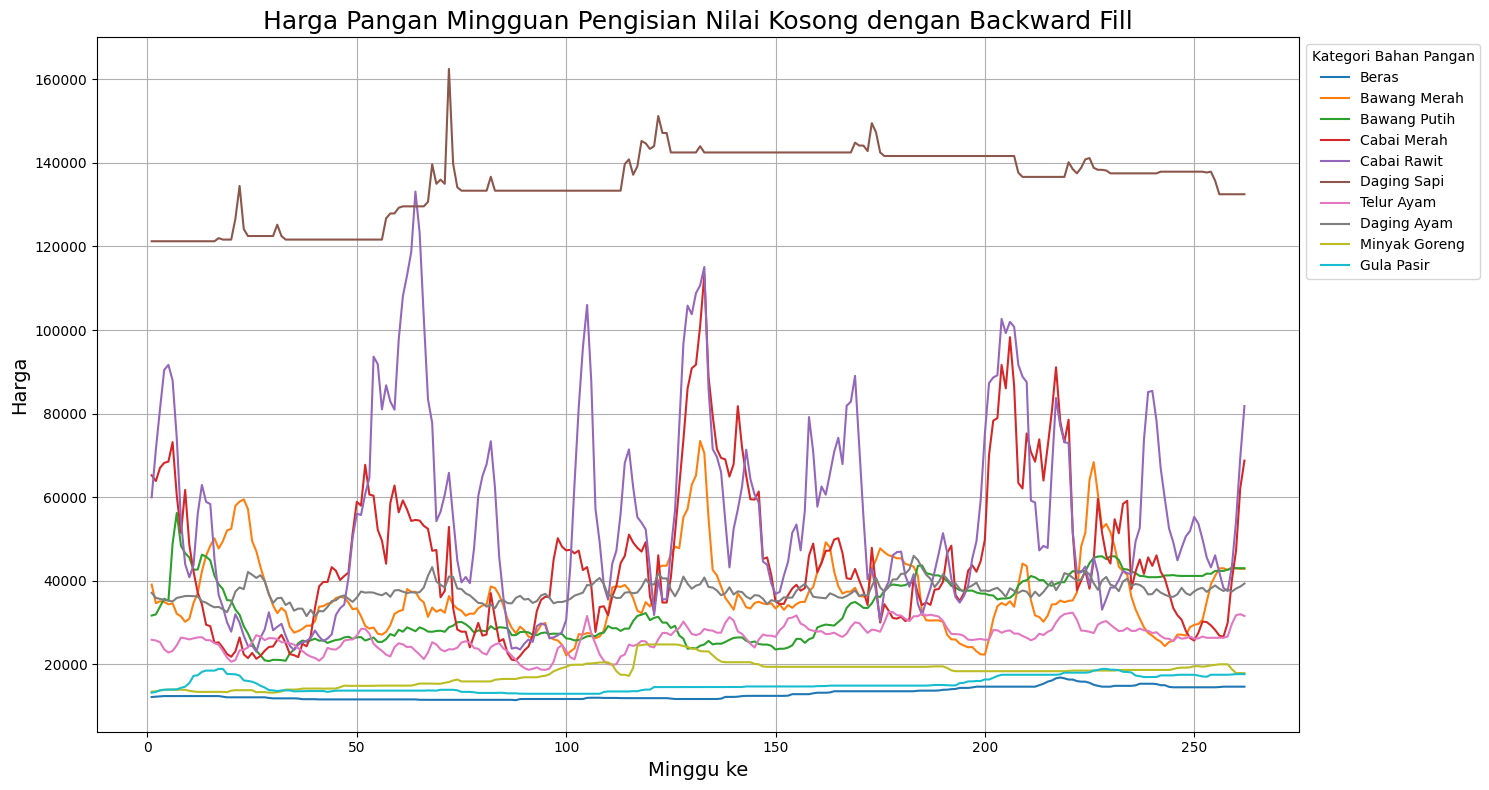

In [45]:
# Visualisasi Harga Bahan Pangan yang Sudah Ditransformasi ke bentuk mingguan
diagramGarisVis(data_mingguan, datetime_col='Minggu ke', title='Harga Pangan Mingguan Pengisian Nilai Kosong dengan Backward Fill')

Data telah diubah ke bentuk mingguan dan diisi nilai yang kosong menggunakan bentuk backward fill, total data mencapai 262 minggu.

Eksplorasi, cari nilai sebarannya biar tau
Konsep 5W1H dan konsep S.M.A.R.T.
1. Bahan Pangan apa saja yang pergerakannya sangat fluktuatif?
2. Tahun berapa yang memiliki harga yang paling ngga stabil?
3. Pada musim apa saja harga naik?
4. Lonjakan data yang tidak biasa (hubungkan dengan laporan keuangan dan situasi sosial) atau deteksi outlier
5. Distribusi harga pangannya apakah skewness dan outlier (pakai IQR)

## Normalisasi Data
<p>Normalisasi data diterapkan pada setiap kolomnya dengan menggunakan rumus:</p>
<div>
<div style="text-align: center;">
    <img src="https://latex.codecogs.com/png.image?\dpi{120}&space;\text{Min-Max}=\frac{x-min}{max-min}" alt="Normalisasi Data">
</div>
</div>

In [46]:
data_mingguan.columns

Index(['Minggu ke', 'Beras', 'Bawang Merah', 'Bawang Putih', 'Cabai Merah',
       'Cabai Rawit', 'Daging Sapi', 'Telur Ayam', 'Daging Ayam',
       'Minyak Goreng', 'Gula Pasir', 'Tahun'],
      dtype='object')

In [49]:
data_mingguan_pilih = data_mingguan.drop(['Tahun', 'Minggu ke'], axis=1)
def min_max_scaling_df(df, col):
    """Fugsi untuk menormalisasi data pada masing-masing harga pangan

    Parameter:
    df = DataFrame yang berisi harga pangan
    col = kolom yang akan dinormalisasi (list)
    """
    data_mingguan_scaled = df.copy()
    data_mingguan_scaled[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return data_mingguan_scaled

data_mingguan_scaling = min_max_scaling_df(data_mingguan, drop_columns)
data_mingguan_scaling

,Minggu ke,Beras,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Daging Sapi,Telur Ayam,Daging Ayam,Minyak Goreng,Gula Pasir,Tahun
0,1,0.139042,0.329858,0.307530,0.479589,0.335528,0.000000,0.520043,0.385576,0.023810,0.042017,2020.0
1,2,0.152855,0.243422,0.314721,0.464645,0.438834,0.000000,0.507403,0.303051,0.029437,0.072269,2020.0
2,3,0.169429,0.252387,0.367738,0.498863,0.528108,0.000000,0.477790,0.284327,0.045887,0.139496,2020.0
3,4,0.180479,0.248879,0.420756,0.511640,0.612478,0.000000,0.353557,0.269764,0.058009,0.164706,2020.0
4,5,0.180479,0.237965,0.407219,0.514997,0.623286,0.000000,0.299386,0.257975,0.064935,0.169748,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,0.594843,0.397778,0.616751,0.097455,0.131686,0.272727,0.576020,0.447295,0.588745,0.764706,2024.0
258,259,0.594843,0.410251,0.626904,0.207796,0.184452,0.272727,0.794150,0.407074,0.488312,0.774790,2024.0
259,260,0.594843,0.405769,0.626904,0.284461,0.284170,0.272727,0.943662,0.457004,0.406926,0.789916,2024.0
260,261,0.594843,0.403430,0.626904,0.446129,0.421124,0.272727,0.962441,0.489598,0.406926,0.789916,2024.0


<h3>Transpose Data</h3>
Agar bisa diolah menjadi data time series mingguan, dilakukan transpose data dengan menjadikan Minggu-ke menjadi header.

In [20]:
# Transpose dan menjadikan mingguan sebagai header 

data_mingguan_transpose = data_mingguan_scaling.T
new_header = data_mingguan_transpose.iloc[0]
data_transpose = data_mingguan_transpose[1:]
data_transpose.columns = new_header
data_transpose

Minggu ke,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,261,262
Beras Kualitas Medium I,0.139042,0.152855,0.169429,0.180479,0.180479,0.180479,0.180479,0.180479,0.180479,0.180479,...,0.567219,0.567219,0.567219,0.578269,0.594843,0.594843,0.594843,0.594843,0.594843,0.594843
Bawang Merah Ukuran Sedang,0.329858,0.243422,0.252387,0.248879,0.237965,0.242253,0.193919,0.181641,0.156305,0.170532,...,0.250244,0.331514,0.370883,0.405574,0.406354,0.397778,0.410251,0.405769,0.40343,0.40343
Bawang Putih Ukuran Sedang,0.30753,0.314721,0.367738,0.420756,0.407219,0.793288,1.0,0.778624,0.728426,0.69938,...,0.590807,0.588832,0.608573,0.608573,0.608573,0.616751,0.626904,0.626904,0.626904,0.626904
Cabai Merah Keriting,0.479589,0.464645,0.498863,0.51164,0.514997,0.565349,0.426638,0.330374,0.441364,0.298755,...,0.098971,0.090525,0.078722,0.063996,0.06118,0.097455,0.207796,0.284461,0.446129,0.517488
Cabai Rawit Merah,0.335528,0.438834,0.528108,0.612478,0.623286,0.589592,0.463718,0.283898,0.190264,0.161657,...,0.204523,0.18318,0.209336,0.172282,0.138407,0.131686,0.184452,0.28417,0.421124,0.533739
Daging Sapi Kualitas 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.398788,0.403636,0.351273,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727
Telur Ayam Ras Segar,0.520043,0.507403,0.47779,0.353557,0.299386,0.326833,0.424341,0.557963,0.544962,0.52546,...,0.553629,0.554352,0.554352,0.554352,0.554352,0.57602,0.79415,0.943662,0.962441,0.931744
Daging Ayam Ras Segar,0.385576,0.303051,0.284327,0.269764,0.257975,0.242718,0.301664,0.316921,0.332871,0.334258,...,0.401526,0.460472,0.508322,0.454924,0.416782,0.447295,0.407074,0.457004,0.489598,0.539875
Minyak Goreng Kemasan Bermerk 1,0.02381,0.029437,0.045887,0.058009,0.064935,0.061472,0.060606,0.060606,0.060606,0.039827,...,0.548918,0.5671,0.575758,0.588745,0.588745,0.588745,0.488312,0.406926,0.406926,0.406926
Gula Pasir Lokal,0.042017,0.072269,0.139496,0.164706,0.169748,0.176471,0.176471,0.236975,0.285714,0.430252,...,0.685714,0.764706,0.764706,0.764706,0.764706,0.764706,0.77479,0.789916,0.789916,0.789916


In [50]:
data_mingguan_scaling.isnull().sum()

Minggu ke        0
Beras            0
Bawang Merah     0
Bawang Putih     0
Cabai Merah      0
Cabai Rawit      0
Daging Sapi      0
Telur Ayam       0
Daging Ayam      0
Minyak Goreng    0
Gula Pasir       0
Tahun            0
dtype: int64

<h2>Menghitung Jarak Antar Data (Dynamic Time Warping)</h2>
Dengan rumus:
<div>
<div align="center">
    <img src="https://latex.codecogs.com/png.image?\dpi{150}&space;D_{i,j}=L_{i,j}+\min\left\{D_{i-1,j},D_{i,j-1},D_{i-1,j-1}\right\}" alt="Normalisasi Data">
</div>
</div>

referensi [di sini](https://medium.com/@markstent/dynamic-time-warping-a8c5027defb6)

In [53]:
from scipy.interpolate import interp1d 
from dtaidistance import dtw
from scipy.stats import pearsonr

# Coba dua data dulu
distance, paths = dtw.warping_paths(data_mingguan['Cabai Merah'], data_mingguan['Cabai Rawit'], use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

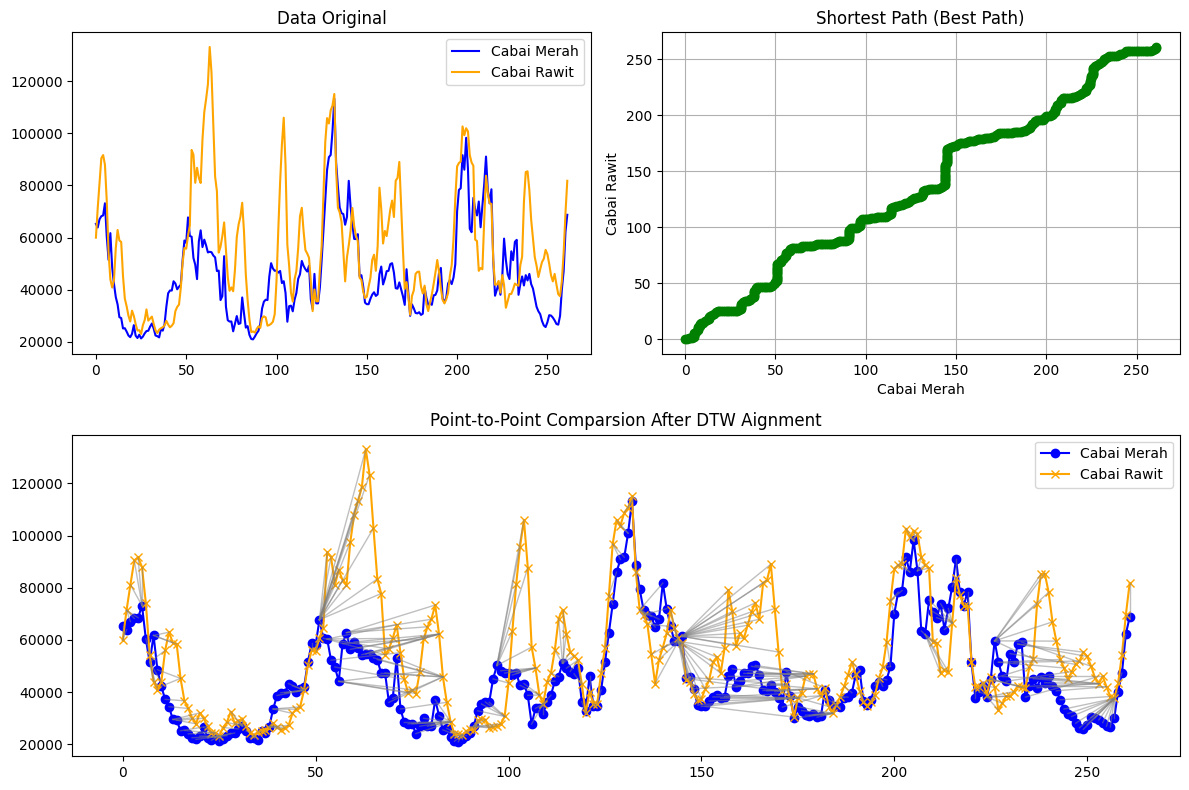

In [59]:
def align_dtw(time_series1, time_series2, label1, label2):
    plt.figure(figsize=(12,8))
    
    # Original Time Series Plot
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax1.plot(time_series1, label=label1, color='blue')
    ax1.plot(time_series2, label=label2, color='orange')
    ax1.set_title('Data Original')
    ax1.legend()
    
    # Best Path
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax2.plot(np.array(best_path)[:,0], np.array(best_path)[:,1], 'green', marker='o', linestyle='-')
    ax2.set_title('Shortest Path (Best Path)')
    ax2.set_xlabel(label1)
    ax2.set_ylabel(label2)
    ax2.grid(True)
    
    # Point to point Comparsion Plot
    ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
    ax3.plot(time_series1, label=label1, color='blue', marker='o')
    ax3.plot(time_series2, label=label2, color='orange', marker='x')
    for a, b in best_path:
        ax3.plot([a,b], [time_series1[a], time_series2[b]], color='grey', linestyle='-', linewidth=1, alpha=0.5)
    ax3.set_title('Point-to-Point Comparsion After DTW Aignment')
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

time_series_beras = data_mingguan['Cabai Merah']
label_beras = 'Cabai Merah'
time_series_bamer = data_mingguan['Cabai Rawit']
label_bamer = 'Cabai Rawit'
align_dtw(time_series_beras, time_series_bamer, label_beras, label_bamer)

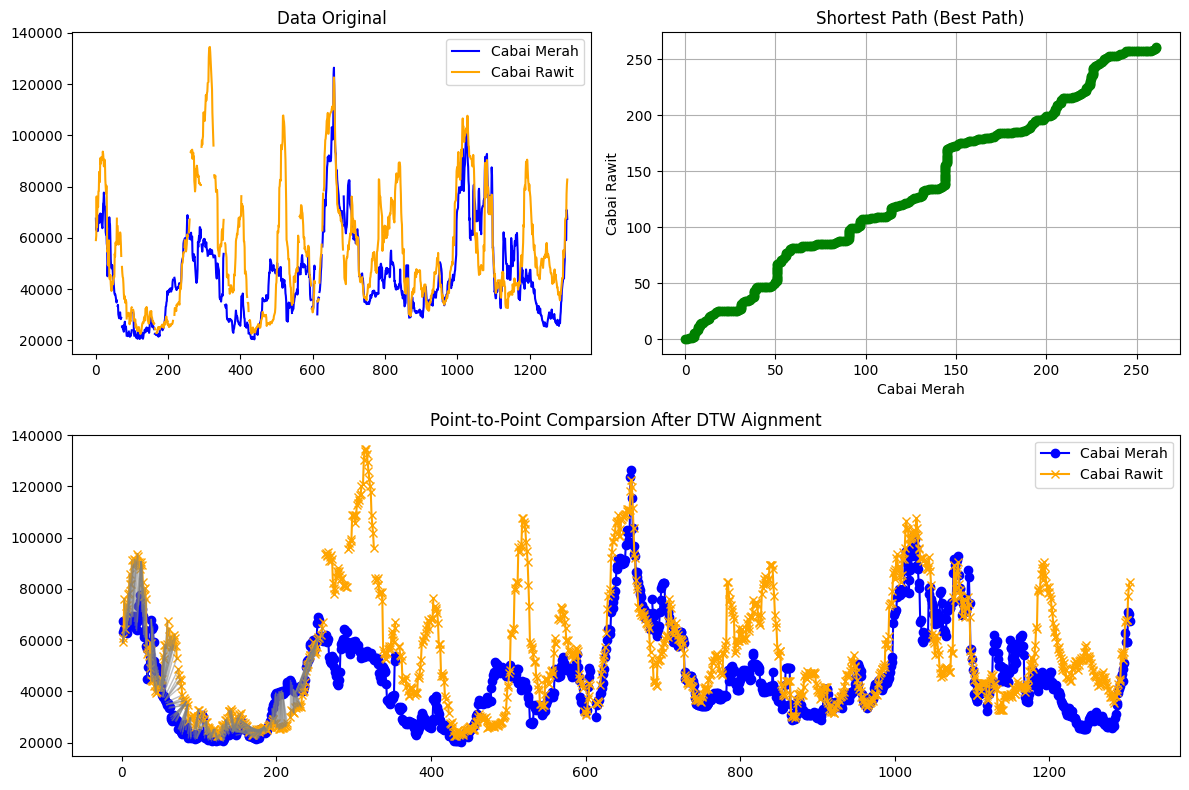

In [57]:
align_dtw(data['Cabai Merah'], data['Cabai Rawit'], 'Cabai Merah', 'Cabai Rawit')

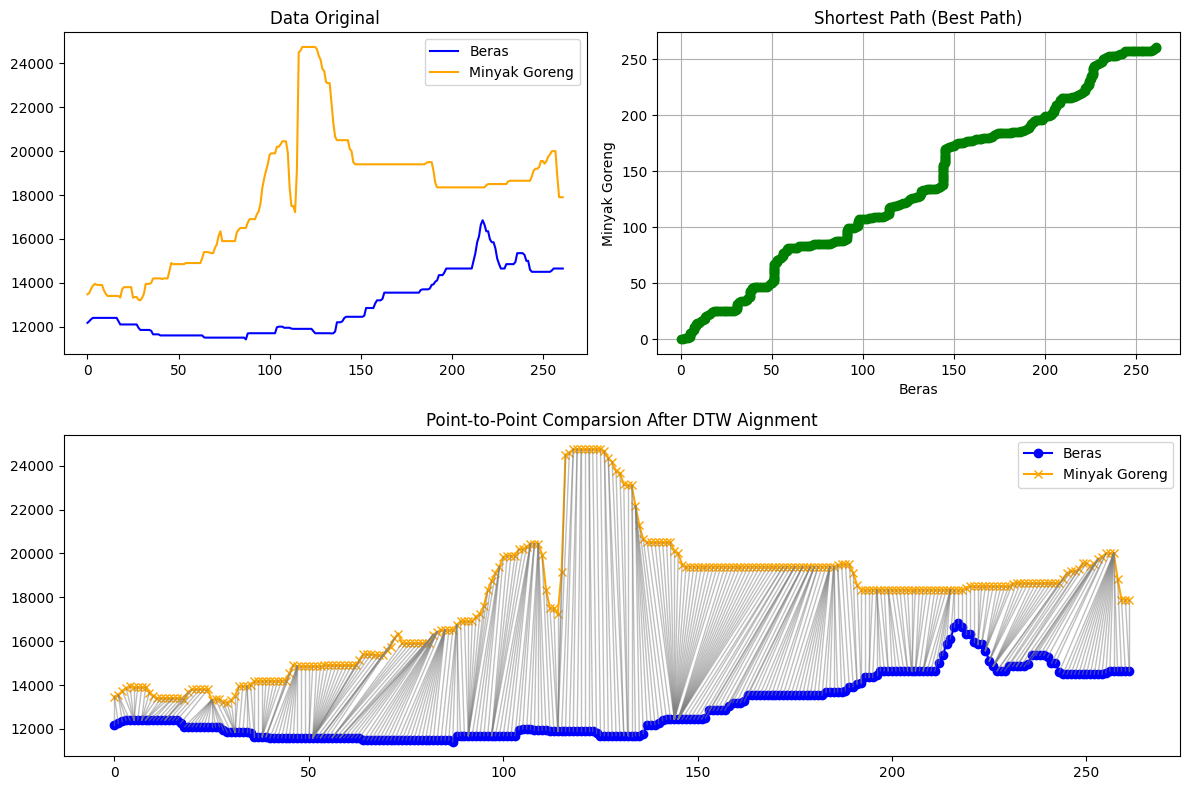

In [62]:
align_dtw(data_mingguan['Beras'], data_mingguan['Minyak Goreng'], 'Beras', 'Minyak Goreng')

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

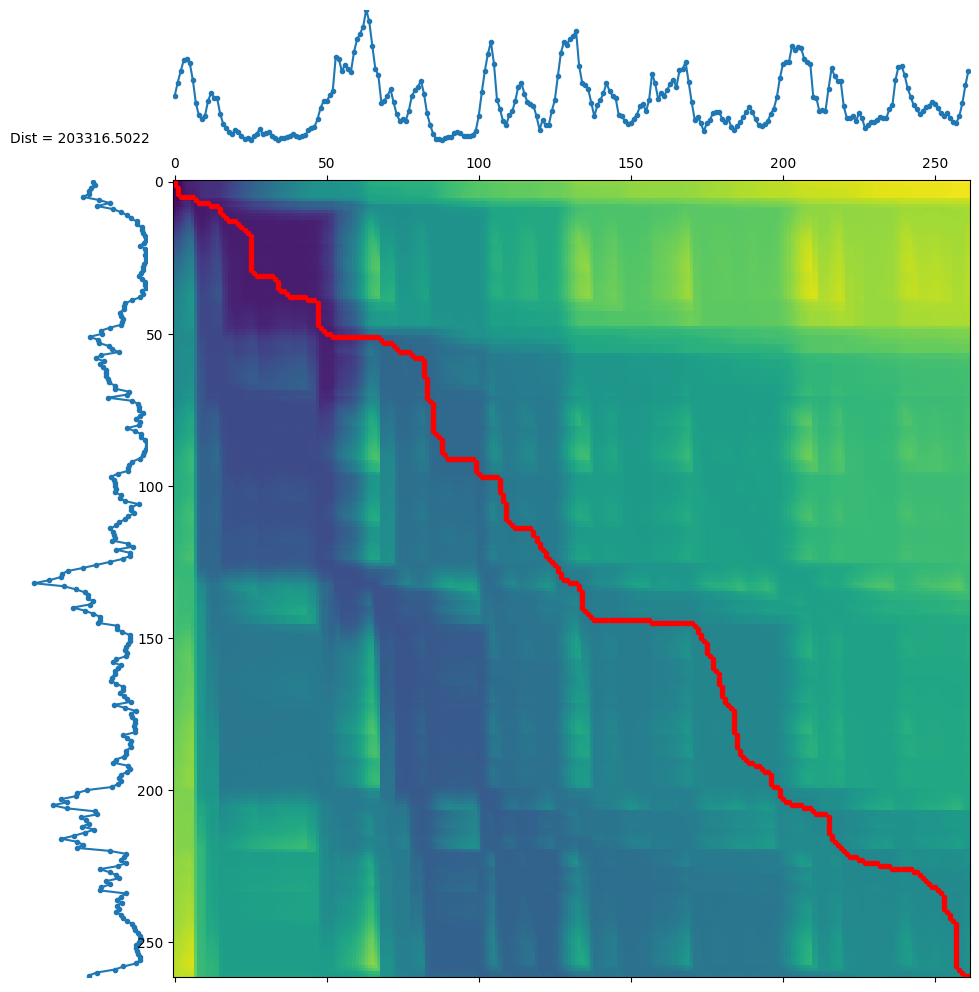

In [65]:
from dtaidistance import dtw_visualisation as dtwvis

dtwvis.plot_warpingpaths(time_series_beras, time_series_bamer, paths, best_path)

In [71]:
data_mingguan_ds = data_mingguan_scaling.drop(['Tahun', 'Minggu ke'], axis=1).values.tolist()

ds = dtw.distance_matrix_fast(data_mingguan_ds)
ds

Exception: Type of series not supported, expected numpy.array or array.array but got <class 'list'>

100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


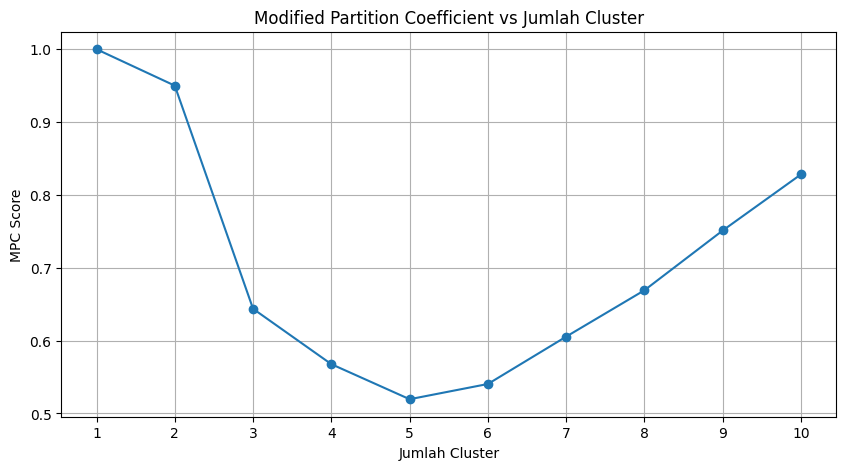

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.metrics import cdist_dtw
from sklearn.metrics import pairwise_distances
import skfuzzy as fuzz
from tqdm import tqdm

# Data shape: (fitur, sampel)
# Jika pakai time series mingguan transpose:
data = data_mingguan_transpose.values

# Fungsi Modified Partition Coefficient (MPC)
def modified_partition_coefficient(U):
    n = U.shape[1]  # jumlah data
    c = U.shape[0]  # jumlah cluster
    pc = np.sum(U**2) / n
    mpc = pc - (c - 1) / (c * (n - 1))
    return mpc

# Simpan skor MPC
mpc_scores = []

# Loop dari 1 sampai 10 cluster
for n_cluster in tqdm(range(1, 11)):
    # Hitung jarak DTW antar data
    dist_matrix = cdist_dtw(data)

    # Konversi ke derajat keanggotaan awal secara acak
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        dist_matrix.T,             # data input
        c=n_cluster,               # jumlah cluster
        m=2.0,                     # fuzziness coefficient
        error=0.005,               # error threshold
        maxiter=1000,              # maksimum iterasi
        init=None,                 # inisialisasi otomatis
        seed=42
    )

    # Hitung MPC
    mpc = modified_partition_coefficient(u)
    mpc_scores.append(mpc)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), mpc_scores, marker='o', linestyle='-')
plt.title('Modified Partition Coefficient vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('MPC Score')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [34]:
from fcmeans import FCM

data_transpose = data_transpose.astype(float)
data_ndarray = data_transpose.to_numpy()

def compute_mpc(u, m=5):
    n = u.shape[0]  # jumlah data
    mpc = 1 - (m / (m - 1)) * (1 - (1 / n) * np.sum(u ** 2))
    return mpc

def partition_coefficient(u): # mendekati 1 semakin tegas
    n = u.shape[0]
    return np.sum(u**2)/n

def partition_entropy(u): # Mendekati 0 semakin jelas / minim fuzzy
    n = u.shape[0]
    return -np.sum(u * np.log(u + 1e-10))/n

for i in range(1,10):
    fcm = FCM(n_clusters=i, max_iter=100)
    fcm.fit(data_ndarray)
    centroids = fcm.centers
    membership_mat = fcm.u
    mpc_value = compute_mpc(fcm.u)
    pc = partition_coefficient(fcm.u)
    pe = partition_entropy(fcm.u)
    print(f"Nilai MPC pada cluster ke {i}: {mpc_value:.4f}")
    print(f"Nilai Partition Coefficient pada cluster ke {i}: {pc:.4f}")
    print(f"Nilai Partition Entropy pada cluster ke {i}: {pe:.4f}")
    label = np.argmax(membership_mat, axis =1)
    print('Label', label)

# label = np.argmax(membership_mat,axis=1)


# print(label)
# print("Matriks keanggotaan fuzzy:")
# print(membership_mat)

Nilai MPC pada cluster ke 1: 1.0000
Nilai Partition Coefficient pada cluster ke 1: 1.0000
Nilai Partition Entropy pada cluster ke 1: -0.0000
Label [0 0 0 0 0 0 0 0 0 0]
Nilai MPC pada cluster ke 2: 0.5755
Nilai Partition Coefficient pada cluster ke 2: 0.6604
Nilai Partition Entropy pada cluster ke 2: 0.5160
Label [0 0 0 0 0 1 0 1 1 1]
Nilai MPC pada cluster ke 3: 0.4768
Nilai Partition Coefficient pada cluster ke 3: 0.5814
Nilai Partition Entropy pada cluster ke 3: 0.7375
Label [2 0 2 0 0 1 2 1 1 2]
Nilai MPC pada cluster ke 4: 0.4819
Nilai Partition Coefficient pada cluster ke 4: 0.5855
Nilai Partition Entropy pada cluster ke 4: 0.8121
Label [2 1 2 1 1 3 0 3 3 2]
Nilai MPC pada cluster ke 5: 0.4724
Nilai Partition Coefficient pada cluster ke 5: 0.5779
Nilai Partition Entropy pada cluster ke 5: 0.8816
Label [2 1 4 1 1 0 4 3 0 4]
Nilai MPC pada cluster ke 6: 0.5974
Nilai Partition Coefficient pada cluster ke 6: 0.6779
Nilai Partition Entropy pada cluster ke 6: 0.7174
Label [5 4 5 2 2 3 

In [21]:
# Evaluasi
def compute_mpc(u, m=5):
    n = u.shape[0]  # jumlah data
    mpc = 1 - (m / (m - 1)) * (1 - (1 / n) * np.sum(u ** 2))
    return mpc

def partition_coefficient(u):
mpc_value = compute_mpc(fcm.u)
print(f"Nilai MPC: {mpc_value:.4f}")

Nilai MPC: 0.8860


In [22]:
# data_transpose['cluster'] = label
# data_transpose

Minggu ke,1,2,3,4,5,6,7,8,9,10,...,254,255,256,257,258,259,260,261,262,cluster
Beras Kualitas Medium I,0.139042,0.152855,0.169429,0.180479,0.180479,0.180479,0.180479,0.180479,0.180479,0.180479,...,0.567219,0.567219,0.578269,0.594843,0.594843,0.594843,0.594843,0.594843,0.594843,1
Bawang Merah Ukuran Sedang,0.329858,0.243422,0.252387,0.248879,0.237965,0.242253,0.193919,0.181641,0.156305,0.170532,...,0.331514,0.370883,0.405574,0.406354,0.397778,0.410251,0.405769,0.403430,0.403430,0
Bawang Putih Ukuran Sedang,0.307530,0.314721,0.367738,0.420756,0.407219,0.793288,1.000000,0.778624,0.728426,0.699380,...,0.588832,0.608573,0.608573,0.608573,0.616751,0.626904,0.626904,0.626904,0.626904,4
Cabai Merah Keriting,0.479589,0.464645,0.498863,0.511640,0.514997,0.565349,0.426638,0.330374,0.441364,0.298755,...,0.090525,0.078722,0.063996,0.061180,0.097455,0.207796,0.284461,0.446129,0.517488,0
Cabai Rawit Merah,0.335528,0.438834,0.528108,0.612478,0.623286,0.589592,0.463718,0.283898,0.190264,0.161657,...,0.183180,0.209336,0.172282,0.138407,0.131686,0.184452,0.284170,0.421124,0.533739,3
Daging Sapi Kualitas 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.403636,0.351273,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,8
Telur Ayam Ras Segar,0.520043,0.507403,0.477790,0.353557,0.299386,0.326833,0.424341,0.557963,0.544962,0.525460,...,0.554352,0.554352,0.554352,0.554352,0.576020,0.794150,0.943662,0.962441,0.931744,2
Daging Ayam Ras Segar,0.385576,0.303051,0.284327,0.269764,0.257975,0.242718,0.301664,0.316921,0.332871,0.334258,...,0.460472,0.508322,0.454924,0.416782,0.447295,0.407074,0.457004,0.489598,0.539875,6
Minyak Goreng Kemasan Bermerk 1,0.023810,0.029437,0.045887,0.058009,0.064935,0.061472,0.060606,0.060606,0.060606,0.039827,...,0.567100,0.575758,0.588745,0.588745,0.588745,0.488312,0.406926,0.406926,0.406926,7
Gula Pasir Lokal,0.042017,0.072269,0.139496,0.164706,0.169748,0.176471,0.176471,0.236975,0.285714,0.430252,...,0.764706,0.764706,0.764706,0.764706,0.764706,0.774790,0.789916,0.789916,0.789916,5


In [23]:
data_ndarray

array([[0.13904236, 0.15285451, 0.1694291 , ..., 0.59484346, 0.59484346,
        0.59484346],
       [0.32985773, 0.24342233, 0.25238745, ..., 0.40576886, 0.40343013,
        0.40343013],
       [0.30752961, 0.31472081, 0.3677383 , ..., 0.62690355, 0.62690355,
        0.62690355],
       ...,
       [0.38557559, 0.30305132, 0.28432732, ..., 0.45700416, 0.48959778,
        0.53987517],
       [0.02380952, 0.02943723, 0.04588745, ..., 0.40692641, 0.40692641,
        0.40692641],
       [0.04201681, 0.07226891, 0.1394958 , ..., 0.78991597, 0.78991597,
        0.78991597]])

In [32]:
from tslearn.metrics import cdist_dtw
import skfuzzy as fuzz

distance_matrix = cdist_dtw(data_trans)

n_clusters = 5

def fuzzy_clusters(distance_matrix, n_clusters, m=2, max_iter=100, error=1e-5):
    n_sampels = distance_matrix.shape[0]

    u = np.random.dirichlet(np.ones(n_clusters), size=n_sampels).T

    for iter in range(max_iter):
        u_old = u.copy()

        centers = []
        for c in range(n_clusters):
            numer = np.sum((u[c, : ] ** m)[:, None] * distance_matrix, axis=0)
            denom = np.sum(u[c, :] ** m)
            centers.append(numer / denom)
        centers = np.array(centers)

        for i in range(n_sampels):
            for c in range(n_clusters):
                denom_sum = sum([(distance_matrix[i][j] / distance_matrix[i][c]) ** (2 / (m - 1)) for j in range(n_clusters) if distance_matrix[i][c] != 0])
                u[c][i] = 1.0 / denom_sum if denom_sum != 0 else 0
        
        if np.linalg.norm(u - u_old) < error:
            break

    return u, centers

membership_matrix, cluster_centers = fuzzy_clusters(distance_matrix, n_clusters)

labels = np.argmax(membership_matrix, axis=0)

def modified_partition_matrix(u):
    n = u.shape[1]
    c = u.shape[0]
    mpc = (np.sum(u ** 2) - (n/c)) / (n - (n/c))
    return mpc

mpc_score = modified_partition_matrix(membership_matrix)

print('Label clusters: ', labels)
print('Membership matrix:\n', membership_matrix)
print('MPC Score: ', round(mpc_score,4))

NameError: name 'data_trans' is not defined

In [33]:
from tslearn.metrics import cdist_dtw, dtw, dtw_path

data = data_transpose.to_numpy()
data = data.reshape((data.shape[0], data.shape[1], 1)) # Bentuk (n_sample, time_stap,1)

# ukuran jarak
dtw_distance = cdist_dtw(data)

# FCM Clustering
for i in range(1,10):
    fcm = FCM(n_clusters=i, max_iter=100)
    fcm.fit(data_ndarray)
    centroids = fcm.centers
    membership_mat = fcm.u
    mpc_value = compute_mpc(fcm.u)
    print(f"Nilai MPC pada cluster ke {i}: {mpc_value:.4f}")
    label = np.argmax(membership_mat, axis =1)
    print('Label', label)


Nilai MPC pada cluster ke 1: 1.0000
Label [0 0 0 0 0 0 0 0 0 0]
Nilai MPC pada cluster ke 2: 0.4702
Label [0 1 0 1 1 1 1 1 1 0]
Nilai MPC pada cluster ke 3: 0.4124
Label [1 0 1 0 0 2 2 2 2 1]
Nilai MPC pada cluster ke 4: 0.3912
Label [3 0 3 0 0 2 1 1 2 3]
Nilai MPC pada cluster ke 5: 0.4563
Label [3 1 3 1 1 4 0 0 4 2]
Nilai MPC pada cluster ke 6: 0.5570
Label [3 5 3 5 5 4 0 1 4 2]
Nilai MPC pada cluster ke 7: 0.6566
Label [3 0 5 6 6 1 2 2 4 5]
Nilai MPC pada cluster ke 8: 0.7752
Label [5 4 5 3 2 6 1 7 6 0]
Nilai MPC pada cluster ke 9: 0.8867
Label [6 4 3 7 8 5 2 0 1 3]


<class 'numpy.ndarray'> (262,)


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data_features[:, 0], data_features[:, 1], c=labels, cmap='rainbow')
plt.title("Hasil FCM Clustering dari Data Mingguan")
plt.grid(True)
plt.show()
